# READ THIS CELL FIRST !!
In order to execute this file make sure to have in your environment the packages in the below cell.

This script will work for .csv files with the following name structure (just for plotting the energy, temperature and Memory results): 

run{1,2}-gpu-epoch10-batch128-{pytorch,tensorflow}-{CIFAR10,CIFAR100,SVHN}-{resnet50,resnet101,resnet152}-W.csv ->
run1-gpu-epoch10-batch128-pytorch-CIFAR10-resnet50-W.csv

Also make sure to write in lowercase the name of the framework which you want to plot the images from (i.e. FRAMEWORK = "pytorch")

In [7]:

import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
from PIL import Image,ImageOps

FRAMEWORK = "pytorch"

def plot_3(energy,temperature,memory,run,dataset,framework):

    # Plot all columns except the first one against time_s
    energy = energy.sort_index(axis=1,ascending=False)
    temperature= temperature.sort_index(axis=1,ascending=False)
    memory= memory.sort_index(axis=1,ascending=False)

    # create a subplot with 3 plots
    fig, axes = plt.subplots(1, 3, figsize=(30, 5))

    # create random datasets
    df_melted = energy.melt(id_vars="time", var_name="CNN", value_name="power (W)")
    sns.lineplot(data=df_melted, x="time", y="power (W)", hue="CNN",ax=axes[0])
    axes[0].set_title("Energy Consumption")

    df_melted = temperature.melt(id_vars="time", var_name="CNN", value_name="temperature (Cº)")
    sns.lineplot(data=df_melted, x="time", y="temperature (Cº)", hue="CNN",ax=axes[1])
    axes[1].set_title("Temperature")

    df_melted = memory.melt(id_vars="time", var_name="CNN", value_name="memory (Mib)")
    sns.lineplot(data=df_melted, x="time", y="memory (Mib)", hue="CNN",ax=axes[2])
    axes[2].set_title("Memory Usage")


    fig.suptitle(run + " | Performance Metrics on Dataset "+ dataset,fontsize=20)
    
    # Save the plot to a file
    file_name = "plots/"+framework + "/"+ run + "-"+ dataset+".png"
    plt.savefig(file_name)    

    plt.show()


This first block of code makes the plot grouped by the Dataset name

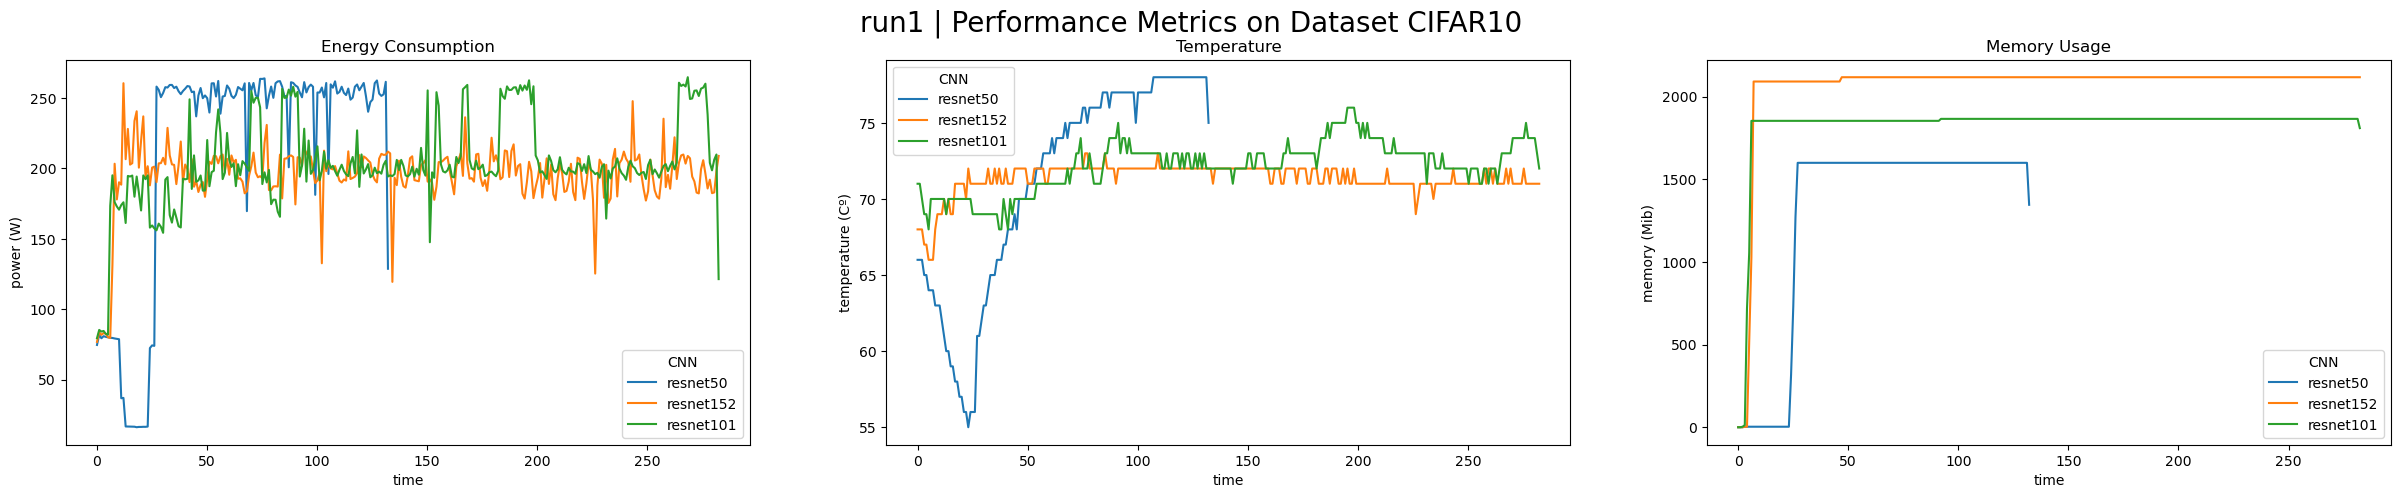

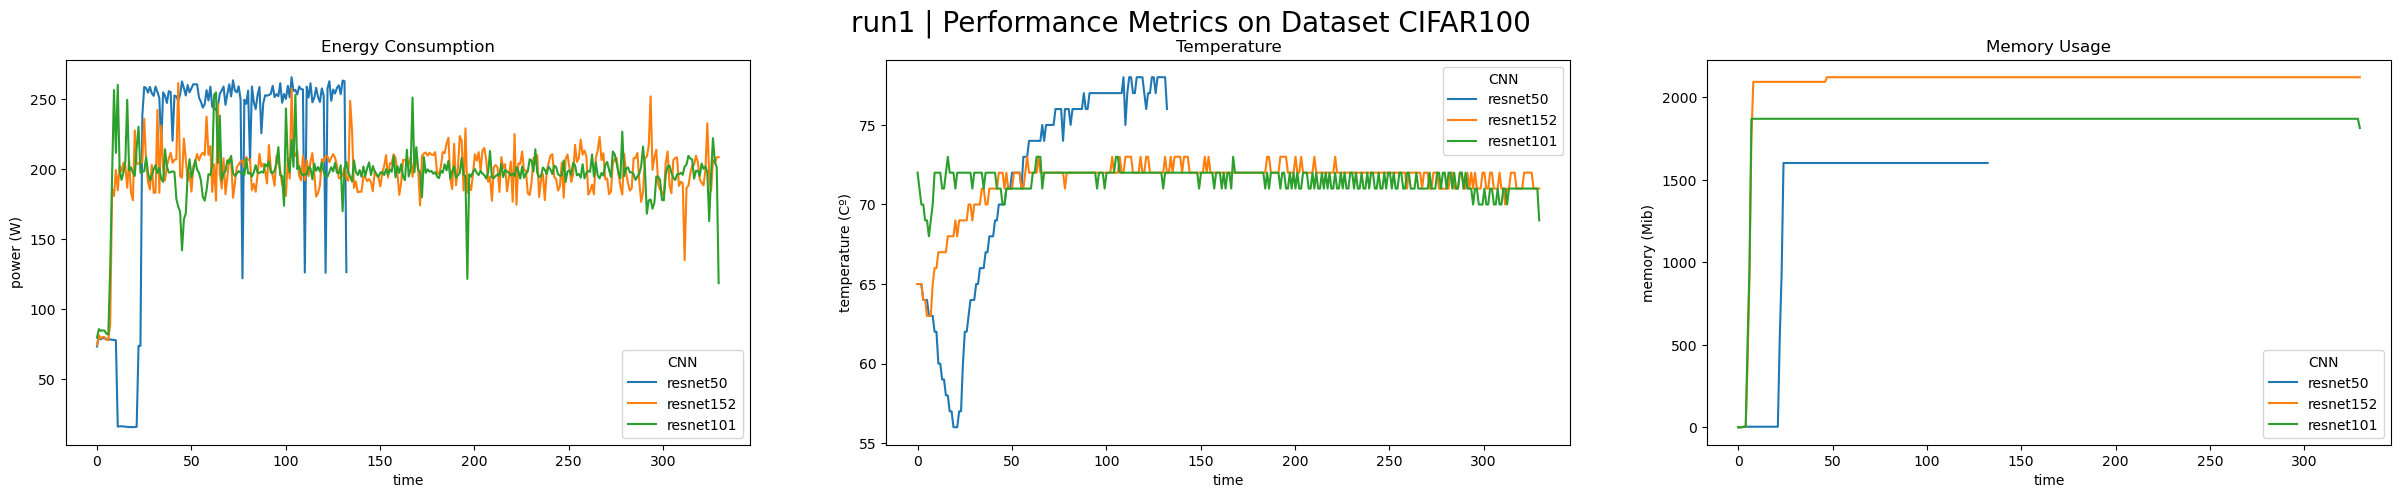

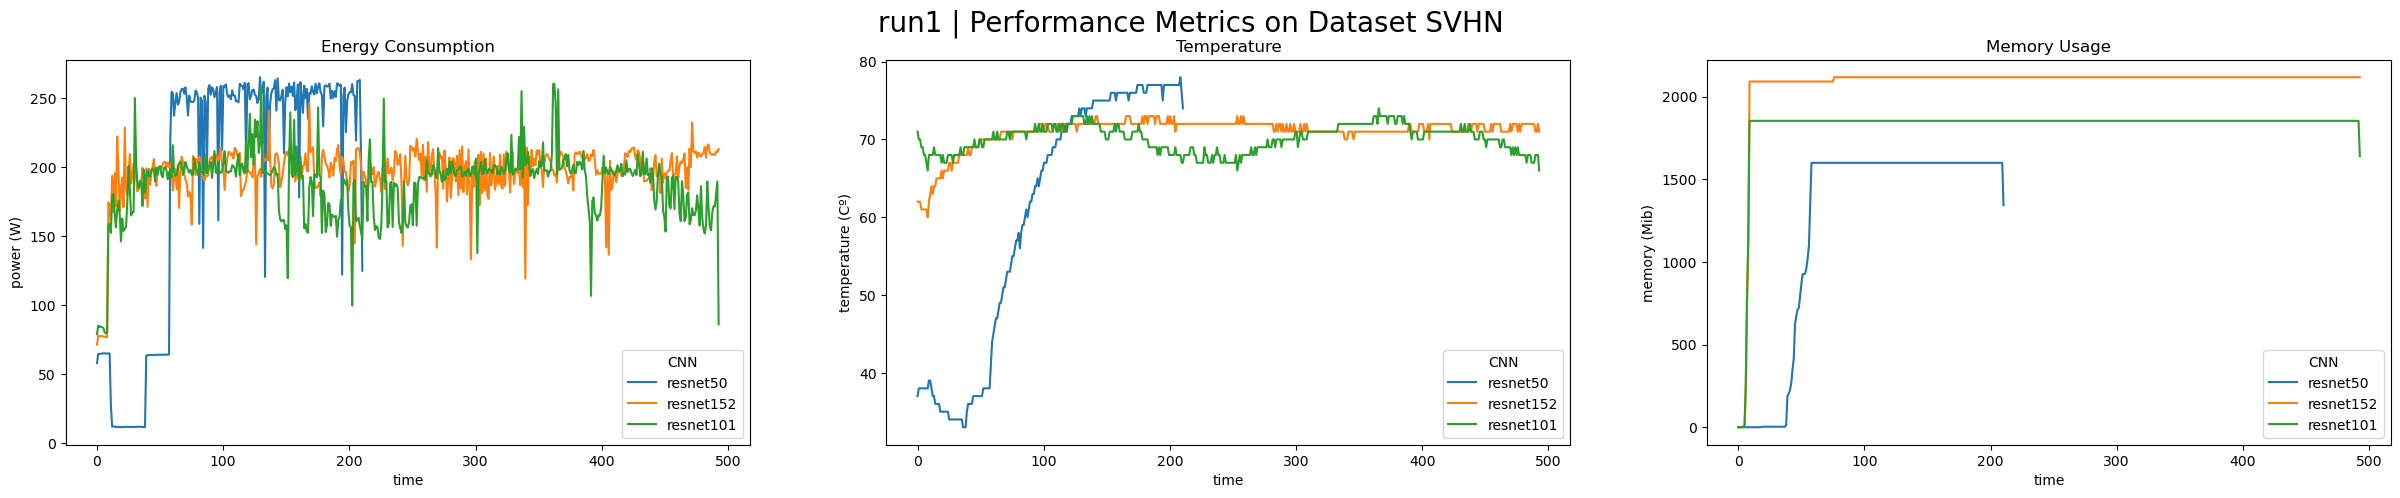

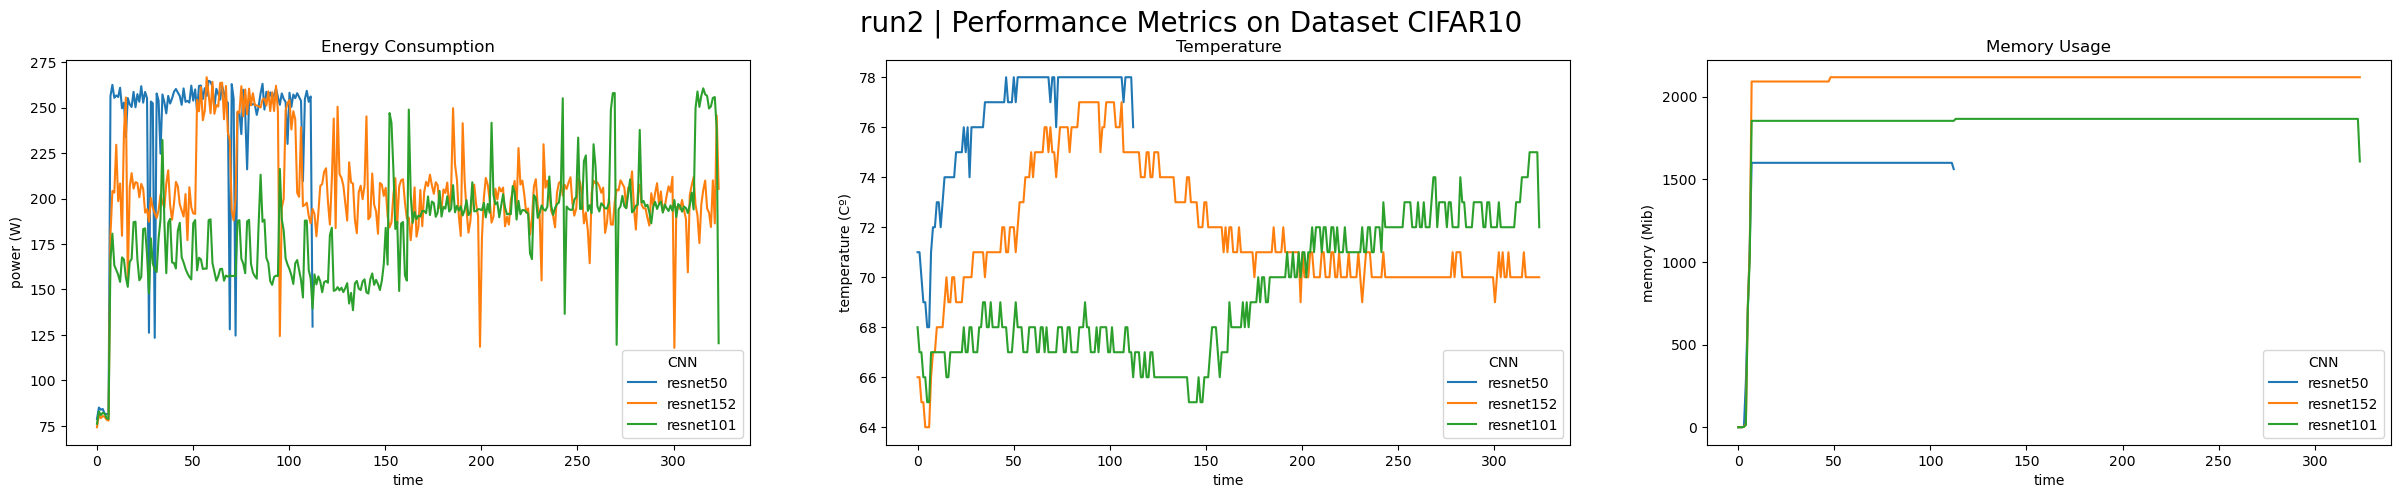

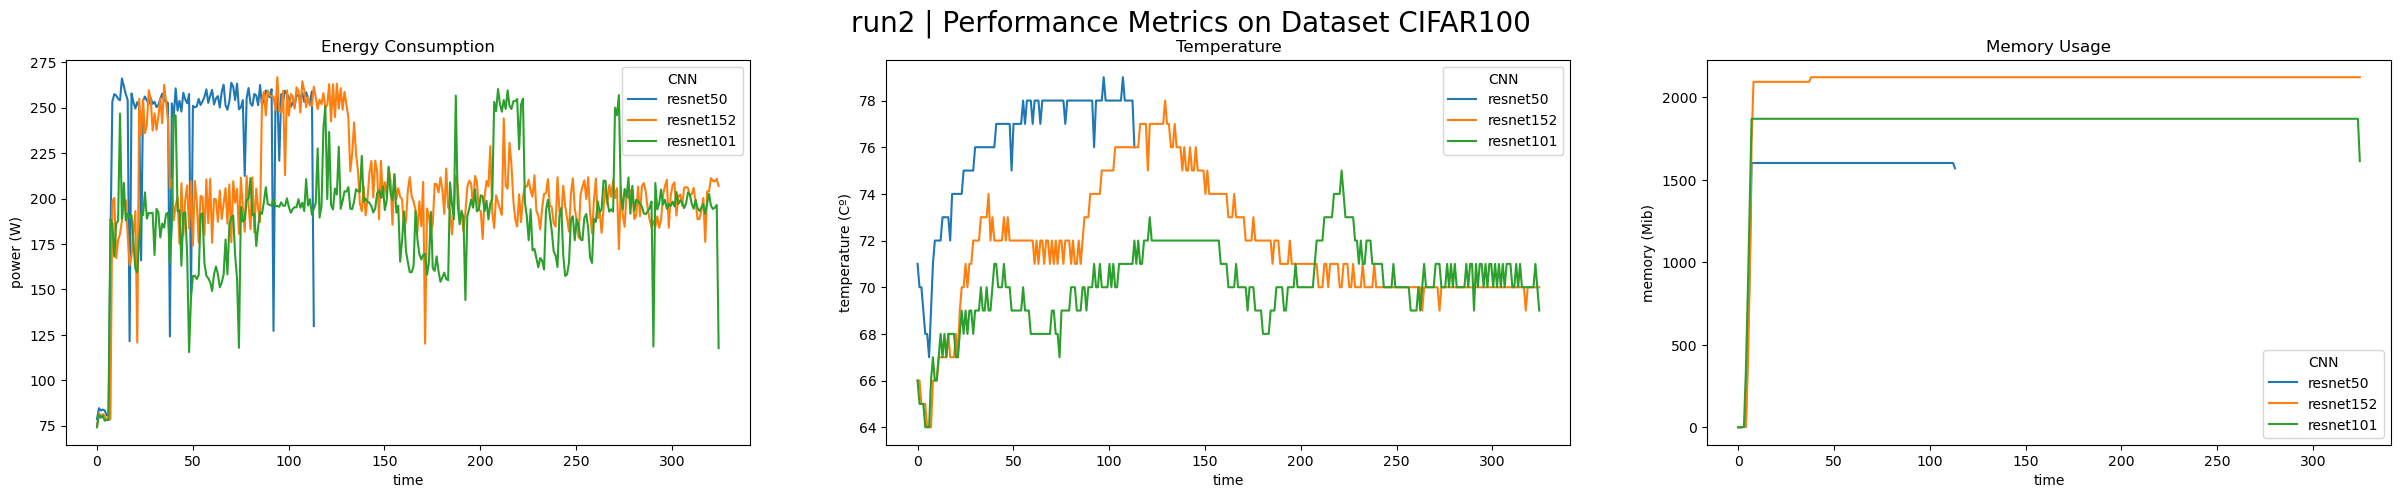

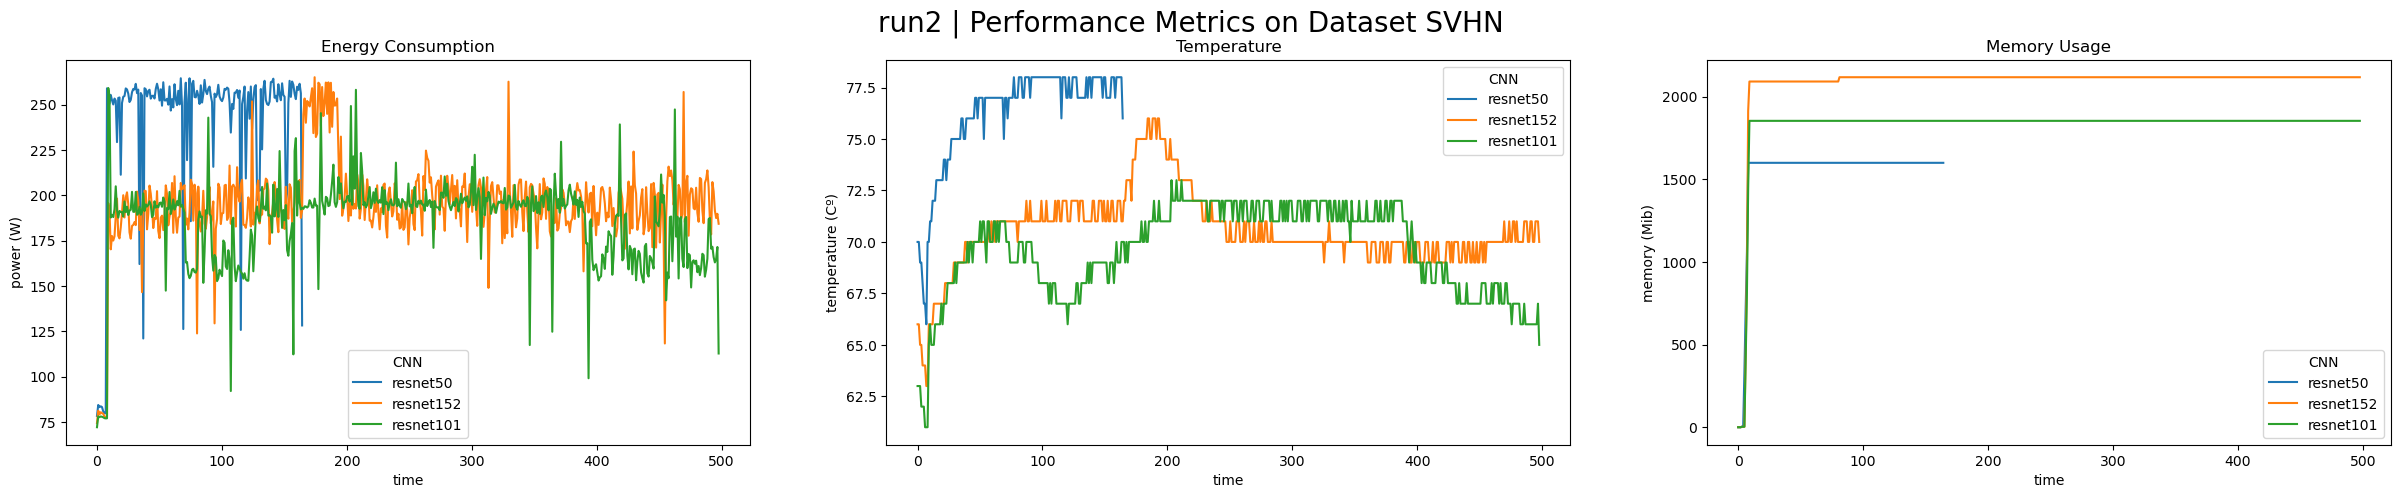

In [9]:

folder_path = "experiments/gpu/"+FRAMEWORK+"/"
file_names= os.listdir(folder_path)
new_column_names = {
    "timestamp": "timestamp",
    "power.draw [W]": "Energy",
    "temperature.gpu": "Temperature",
    "memory.used [MiB]": "Memory"
}

datasets = ["CIFAR10","CIFAR100","SVHN"]

energy_C10 = pd.DataFrame()
temperature_C10 = pd.DataFrame()
memory_C10 = pd.DataFrame()

energy_C100 = pd.DataFrame()
temperature_C100 = pd.DataFrame()
memory_C100 = pd.DataFrame()

energy_S = pd.DataFrame()
temperature_S = pd.DataFrame()
memory_S = pd.DataFrame()


for file in file_names:
    if ".csv" in file:
        info = file.split("-")

        run_n = info[0]
        epoch = info[2][-2:]
        batch = info[3][-3:]
        framework = info[4]        
        dataset = info[5]
        resnet = info[6]
        type = info[7][0]

        if type == "W":
            
            if datasets[0] ==dataset:
                df = pd.read_csv(folder_path+file, names=new_column_names.keys(), header=0)
                df = df.rename(columns=new_column_names)

                # Since the resnet 152 is the one which takes longer to train we take its timestamp 
                # (I have checked and it has almost the same seconds interval compared with the other resnets)
                if "152" in resnet:
                    df['timestamp'] = pd.to_datetime(df['timestamp'])
                    df['time_sec'] = (df['timestamp'] - df['timestamp'][0]).dt.total_seconds()    
                    energy_C10["time"] = df['time_sec'] 
                    temperature_C10["time"] = df['time_sec'] 
                    memory_C10["time"] = df['time_sec'] 

                energy_C10[resnet] = df['Energy'].str.strip('W').astype(float)
                temperature_C10[resnet] = df['Temperature']
                memory_C10[resnet] = df['Memory'].str.strip('MiB').astype(float)

                if len(energy_C10.columns) == 4:
                    plot_3(energy_C10,temperature_C10,memory_C10,run_n,dataset,framework)
                    energy_C10 = pd.DataFrame()
                    temperature_C10 = pd.DataFrame()
                    memory_C10 = pd.DataFrame()

            elif datasets[1] ==dataset:
                df = pd.read_csv(folder_path+file, names=new_column_names.keys(), header=0)
                df = df.rename(columns=new_column_names)

                if "152" in resnet:
                    df['timestamp'] = pd.to_datetime(df['timestamp'])
                    df['time_sec'] = (df['timestamp'] - df['timestamp'][0]).dt.total_seconds()    
                    energy_C100["time"] = df['time_sec'] 
                    temperature_C100["time"] = df['time_sec'] 
                    memory_C100["time"] = df['time_sec'] 
            
                energy_C100[resnet] = df['Energy'].str.strip('W').astype(float)
                temperature_C100[resnet] = df['Temperature']
                memory_C100[resnet] = df['Memory'].str.strip('MiB').astype(float)

                if len(energy_C100.columns) == 4:
                    plot_3(energy_C100,temperature_C100,memory_C100,run_n,dataset,framework)
                    energy_C100 = pd.DataFrame()
                    temperature_C100 = pd.DataFrame()
                    memory_C100 = pd.DataFrame()

            elif datasets[2] ==dataset:
                df = pd.read_csv(folder_path+file, names=new_column_names.keys(), header=0)
                df = df.rename(columns=new_column_names)

                if "152" in resnet:
                    df['timestamp'] = pd.to_datetime(df['timestamp'])
                    df['time_sec'] = (df['timestamp'] - df['timestamp'][0]).dt.total_seconds()    
                    energy_S["time"] = df['time_sec'] 
                    temperature_S["time"] = df['time_sec'] 
                    memory_S["time"] = df['time_sec'] 

                energy_S[resnet] = df['Energy'].str.strip('W').astype(float)
                temperature_S[resnet] = df['Temperature']
                memory_S[resnet] = df['Memory'].str.strip('MiB').astype(float)

                if len(energy_S.columns) == 4:
                    plot_3(energy_S,temperature_S,memory_S,run_n,dataset,framework)
                    energy_S = pd.DataFrame()
                    temperature_S = pd.DataFrame()
                    memory_S = pd.DataFrame()

This second block of code groups the images generated in the previous block into 2 plots grouped by run.

In [6]:


path_to_imgs = "plots/"+framework
image_names= os.listdir(path_to_imgs)

count_1 = 0
count_2 = 0

for image in image_names:
    
    img1 = Image.open(path_to_imgs+"/"+image)
    width, height = img1.size
    if "run1" in image:
        if count_1 == 0:

            combined_run1 = ImageOps.expand(img1, border=(0, 0, 0, height*3))
        else:
            
            combined_run1.paste(img1, box=(0, height*count_1))
        
        count_1+=1
    elif "run2" in image:
        if count_2 == 0:
            combined_run2 = ImageOps.expand(img1, border=(0, 0, 0, height*3))
        else:
            combined_run2.paste(img1, box=(0, height*count_2))
        
        count_2+=1
    

# Save the combined image
combined_run1.save(path_to_imgs+"/run_1.png")
combined_run2.save(path_to_imgs+"/run_2.png")